In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Extract Data from reported lobster landings from 1928

data = pd.read_csv("/Users/emmagrotto/Documents/Personal/Roux/Fall22/DS5020/maine-lobster-mlr/data/lobster.table.csv")

year = data['YEAR'].tolist()
pounds = data['POUNDS'].tolist()
celcius = data['STATION (C)'].tolist()
value_millions = data['VALUE(millions)'].tolist()

# limit to 1928 to 2021 as that is when data is most consistent
index = year.index(1928)
year_limited = year[index:]
pounds_limited = [int(p.replace(',', '')) for p in pounds[index:]]
celcius_limited = celcius[index:]
value_millions_limited = value_millions[index:]


# Extract Data from Northeast Annual % area extreme weather

ext_data = pd.read_csv("/Users/emmagrotto/Documents/Personal/Roux/Fall22/DS5020/maine-lobster-mlr/data/cei.csv")

year_cei = ext_data['Date'].tolist()
percent_area = ext_data['Percentage Area'].tolist()

# limit to 1928 to 2021 as that is when data is most consistent
index_cei = year_cei.index(1928)
percent_area_limited = percent_area[index_cei:]


In [4]:
# Extract Data from Sea surface temperature - from 1989

sea_data = pd.read_csv("/Users/emmagrotto/Documents/Personal/Roux/Fall22/DS5020/maine-lobster-mlr/data/1905-2019sst.csv")

date_sea = sea_data['COLLECTION_DATE'].tolist()
max_sea = sea_data['Sea Surface Temp Max C'].tolist()
min_sea = sea_data['Sea Surface Temp Min C'].tolist()
average_sea = sea_data['Sea Surface Temp Ave C'].tolist()

df = pd.DataFrame(list(zip(date_sea, max_sea, min_sea, average_sea)),
               columns =['Date', 'Max', 'Min', 'Avg'])
print(df.shape)

# remove rows with blank fields
df.dropna(
    axis=0,
    how='any',
    inplace=True
)

print(df.shape)

df_average_year = df.groupby(df['Date'].map(lambda x: x.split('/')[-1])).mean()
df_average_year.head()
average_sea_from_1989 = df_average_year['Avg'].tolist()


index_start = year.index(1989)
index_end = year.index(2019) + 1
year_from_1989 = year[index_start:index_end]
pounds_from_1989 = [int(p.replace(',', '')) for p in pounds[index_start:index_end]]
value_millions_from_1989 = value_millions[index_start:index_end]

(11302, 4)
(11105, 4)


/var/folders/67/652y3mjn3690klyly60bb4rr0000gn/T/ipykernel_39710/2163430169.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_average_year = df.groupby(df['Date'].map(lambda x: x.split('/')[-1])).mean()


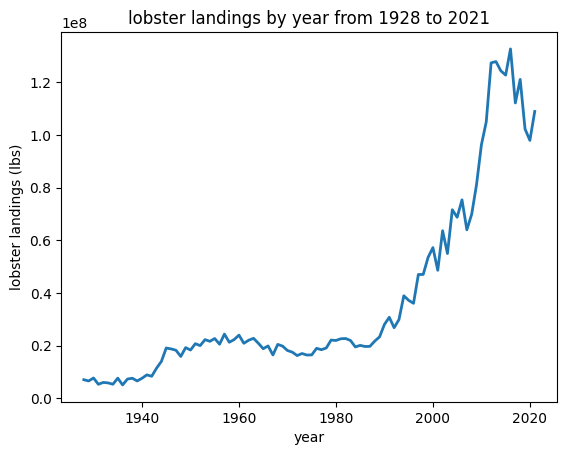

In [16]:
# plot lobster landings over time

fig, ax = plt.subplots()

ax.plot(year_limited, pounds_limited, linewidth=2.0)

ax.set(xlabel='year', ylabel='lobster landings (lbs)',
       title='lobster landings by year from 1928 to 2021')

plt.show()

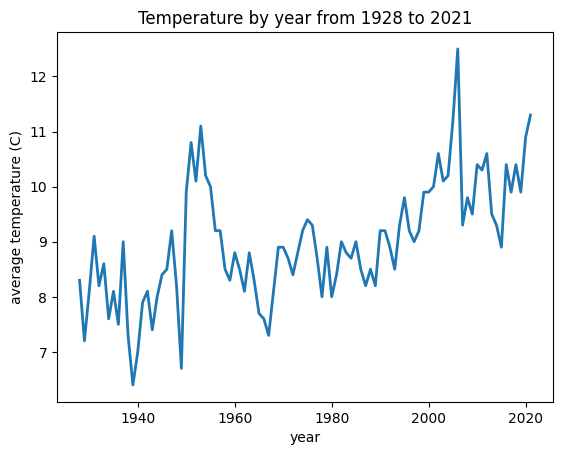

In [17]:
# plot celcius over time 

fig, ax = plt.subplots()

ax.plot(year_limited, celcius_limited, linewidth=2.0)

ax.set(xlabel='year', ylabel='average temperature (C)',
       title='Temperature by year from 1928 to 2021')

plt.show()

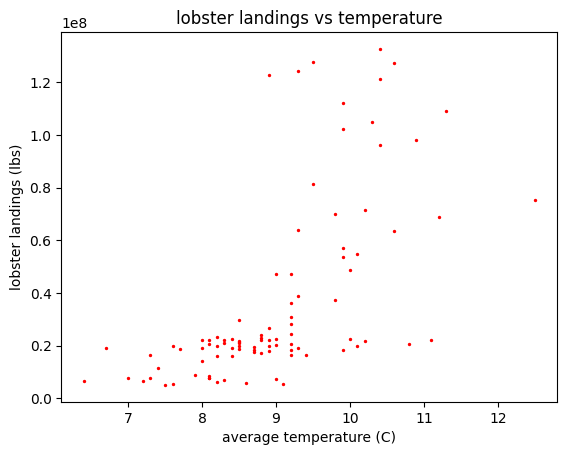

In [7]:
# plot lobster landings vs celcius

fig, ax = plt.subplots()

ax.scatter(celcius_limited, pounds_limited, s=2, c="r")

ax.set(xlabel='average temperature (C)', ylabel='lobster landings (lbs)',
       title='lobster landings vs temperature')

plt.show()

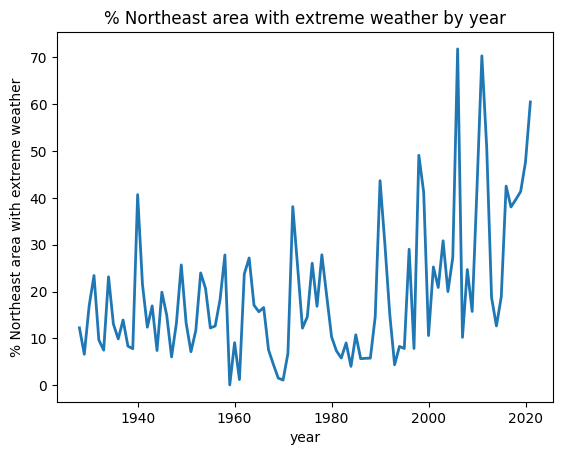

In [8]:
# plot % area extreme weather vs year

fig, ax = plt.subplots()

ax.plot(year_limited, percent_area_limited, linewidth=2.0)

ax.set(xlabel='year', ylabel='% Northeast area with extreme weather',
       title='% Northeast area with extreme weather by year')

plt.show()

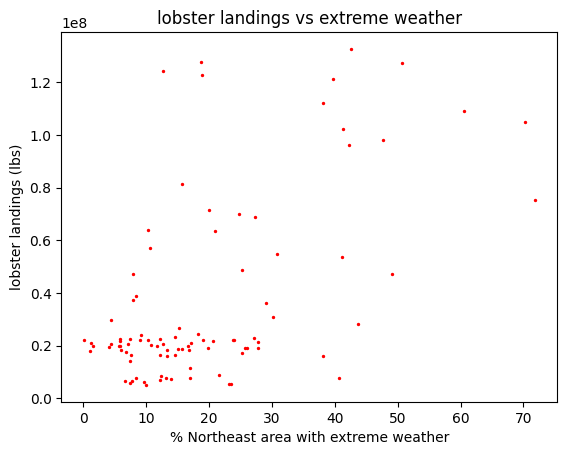

In [9]:
# plot lobster landings vs celcius

fig, ax = plt.subplots()

ax.scatter(percent_area_limited, pounds_limited, s=2, c='r')

ax.set(xlabel='% Northeast area with extreme weather', ylabel='lobster landings (lbs)',
       title='lobster landings vs extreme weather')

plt.show()

[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'Average sea surface temperature'),
 Text(0.5, 1.0, 'Average sea surface temperature by year')]

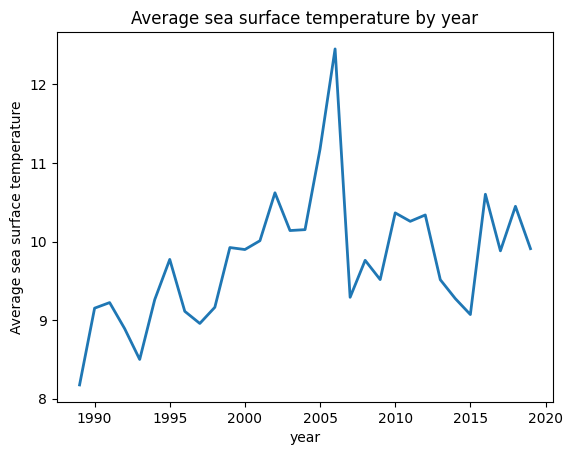

In [11]:
# plot average sea surface temperature vs year

fig, ax = plt.subplots()

ax.plot(year_from_1989, average_sea_from_1989, linewidth=2.0)

ax.set(xlabel='year', ylabel='Average sea surface temperature',
       title='Average sea surface temperature by year')

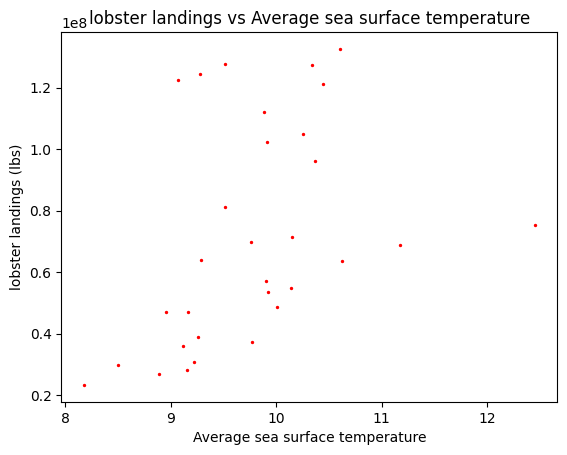

In [12]:
# plot lobster landings vs celcius

fig, ax = plt.subplots()

ax.scatter(average_sea_from_1989, pounds_from_1989, s=2, c='r')

ax.set(xlabel='Average sea surface temperature', ylabel='lobster landings (lbs)',
       title='lobster landings vs Average sea surface temperature')

plt.show()

### Value plots

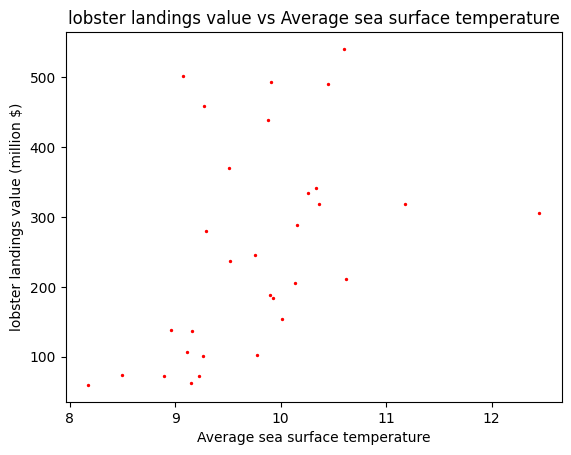

In [13]:
# plot lobster landings vs celcius

fig, ax = plt.subplots()

ax.scatter(average_sea_from_1989, value_millions_from_1989, s=2, c='r')

ax.set(xlabel='Average sea surface temperature', ylabel='lobster landings value (million $)',
       title='lobster landings value vs Average sea surface temperature')

plt.show()

## testing the project code

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read data
lobster_source_data = pd.read_csv("data/lobster.table.csv")
extreme_source_data = pd.read_csv("data/cei.csv")
sea_ocean_temperature_data = pd.read_csv("data/1905-2019sst.csv")

# Extract needed data from summarized lobster reported data
year_all = lobster_source_data['YEAR'].tolist()
lobster_pounds_all = lobster_source_data['POUNDS'].tolist()
celcius_all = lobster_source_data['STATION (C)'].tolist()
value_millions_all = lobster_source_data['VALUE(millions)'].tolist()

# Extract needed data from extreme weather data
year_cei_all = extreme_source_data['Date'].tolist()
percent_area_all = extreme_source_data['Percentage Area'].tolist()

# Extract needed data from surface ocean temperature data
date_sea_all = sea_ocean_temperature_data['COLLECTION_DATE'].tolist()
max_sea_all = sea_ocean_temperature_data['Sea Surface Temp Max C'].tolist()
min_sea_all = sea_ocean_temperature_data['Sea Surface Temp Min C'].tolist()
average_sea_all = sea_ocean_temperature_data['Sea Surface Temp Ave C'].tolist()


# get the index for the years i would like to limit the data with
index_lobster_start = year_all.index(1989)
index_lobster_end = year_all.index(2019) + 1

index_cei_start = year_cei_all.index(1989)
index_cei_end = year_cei_all.index(2019) + 1

# wrangle sea ocean temperature as its reported daily
df = pd.DataFrame(list(zip(date_sea_all, max_sea_all, min_sea_all, average_sea_all)),
               columns =['Date', 'Max', 'Min', 'Avg'])

# remove rows with blank fields
df.dropna(
    axis=0,
    how='any',
    inplace=True
)

df_average_sea_by_year = df.groupby(df['Date'].map(lambda x: x.split('/')[-1]), as_index=False).mean()
print(df_average_sea_by_year.head())

# df_average_sea_since_1989 = df_average_sea_by_year[int(df_average_sea_by_year['Date']) > 1989] 
# df_average_sea_since_1989_2019 = df_average_sea_since_1989[int(df_average_sea_since_1989['Date']) <= 2019] 
# print(df_average_sea_since_1989_2019.shape)

# filter to desired years - target:
year_1989_2019 = year_all[index_start:index_end]
lobster_pounds_1989_2019 = [int(p.replace(',', '')) for p in lobster_pounds_all[index_start:index_end]]

# filter to desired years - predictors:
celcius_all_1989_2019 = celcius_all[index_lobster_start:index_lobster_end]
percent_area_1989_2019 = percent_area_all[index_cei_start:index_cei_end]

# X = dat[:,0:10]
# n_obs,n_pred = np.shape(X)
#print(lobster_pounds_1989_2019)

### Full Multiple Linear Regression
# add column of ones to the design matrix
# X = np.column_stack((np.ones(n),X))

        Max       Min       Avg
0  9.035180  7.290859  8.175900
1  9.908540  8.375482  9.152617
2  9.935674  8.463483  9.223596
3  9.609348  8.049292  8.891785
4  9.352473  7.560989  8.500000


/var/folders/67/652y3mjn3690klyly60bb4rr0000gn/T/ipykernel_39710/3642221614.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_average_sea_by_year = df.groupby(df['Date'].map(lambda x: x.split('/')[-1]), as_index=False).mean()
